In [1]:
from covid_analysis import *

%matplotlib inline
sns.set(style="whitegrid")
FIGSIZE = [12, 8]

# México

In [2]:
estados_analisis = ["Ciudad de México", "Nuevo León", "Jalisco", "Queretaro"]
estados = load_mariorz()
mexico = {}
for ds_name, ds in estados.items():
    mexico[ds_name] = pd.DataFrame({'Mexico': ds.sum(axis=1)})

## Resumen

### Fecha de Actualización:

In [3]:
mexico['confirmados'].index[-1].strftime("%d-%m-%Y")

'14-05-2020'

### Confirmados

In [4]:
sum(mexico['confirmados'].iloc[-1])

42595

### Nuevos Confirmados

In [5]:
sum(mexico['daily_confirmados'].iloc[-1])

2409

### Fallecimientos

In [6]:
sum(mexico['muertos'].iloc[-1])

4477

### Nuevos Fallecimientos

In [7]:
sum(mexico['daily_muertos'].iloc[-1])

257

## Nacional

### México: Confirmados acumulados

,Mexico
Date,
2020-05-01,20739
2020-05-02,22088
2020-05-03,23471
2020-05-04,24905
2020-05-05,26025
2020-05-06,27634
2020-05-07,29616
2020-05-08,31522
2020-05-09,33460


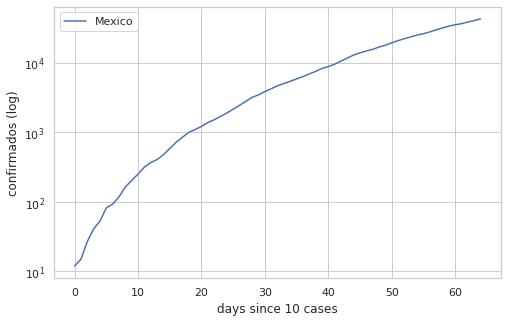

In [8]:
analysis(mexico, ["Mexico"], "confirmados", log=True, smooth=False, since=10)

### México: Confirmados diarios

,Mexico
Date,
2020-05-01,1515
2020-05-02,1349
2020-05-03,1383
2020-05-04,1434
2020-05-05,1120
2020-05-06,1609
2020-05-07,1982
2020-05-08,1906
2020-05-09,1938


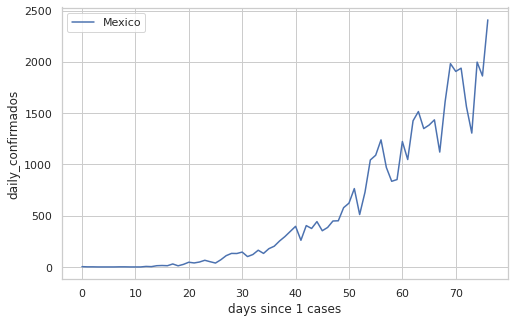

In [9]:
analysis(mexico, ["Mexico"], "daily_confirmados", since=1, smooth=False, log=False)

### México: Fallecimientos acumulados

,Mexico
Date,
2020-05-01,1972
2020-05-02,2061
2020-05-03,2154
2020-05-04,2270
2020-05-05,2507
2020-05-06,2704
2020-05-07,2961
2020-05-08,3160
2020-05-09,3353


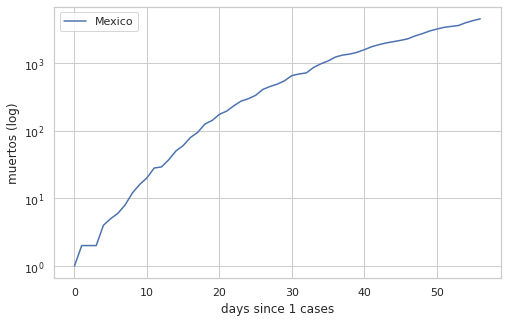

In [10]:
analysis(mexico, ["Mexico"], "muertos", since=1, smooth=False, log=True)

### México: Fallecimientos diarios

,Mexico
Date,
2020-05-01,113
2020-05-02,89
2020-05-03,93
2020-05-04,116
2020-05-05,237
2020-05-06,197
2020-05-07,257
2020-05-08,199
2020-05-09,193


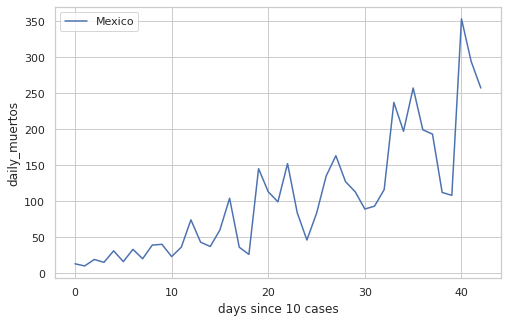

In [11]:
analysis(mexico, ["Mexico"], "daily_muertos", since=10, smooth=False, log=False)

### México: Pruebas reportadas por día, acumuladas

,Mexico
Date,
2020-05-01,91188
2020-05-02,93791
2020-05-03,95839
2020-05-04,100041
2020-05-05,105664
2020-05-06,110994
2020-05-07,117211
2020-05-08,123446
2020-05-09,128148


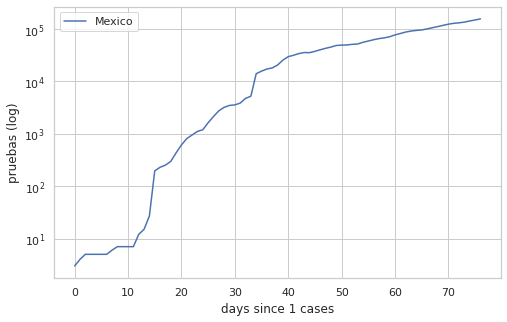

In [12]:
mexico['pruebas'] = mexico['confirmados'].add(mexico['probables']).add(mexico['descartados'])
analysis(mexico, ['Mexico'], 'pruebas', since=1, smooth=False, log=True)

### México: Pruebas reportadas por día

,Mexico
Date,
2020-05-01,3816
2020-05-02,2603
2020-05-03,2048
2020-05-04,4202
2020-05-05,5623
2020-05-06,5330
2020-05-07,6217
2020-05-08,6235
2020-05-09,4702


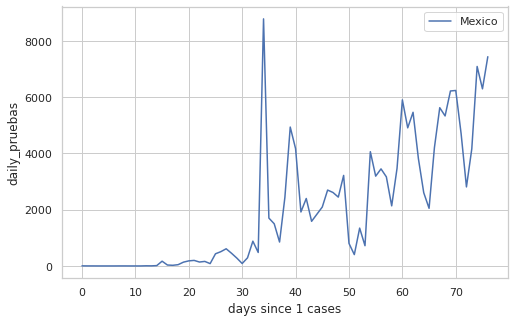

In [13]:
mexico['daily_pruebas'] = mexico['daily_confirmados'].add(mexico['daily_probables']).add(mexico['daily_descartados'])
analysis(mexico, ["Mexico"], "daily_pruebas", since=1, smooth=False, smooth_window=7, log=False)#, show_last_days=50)

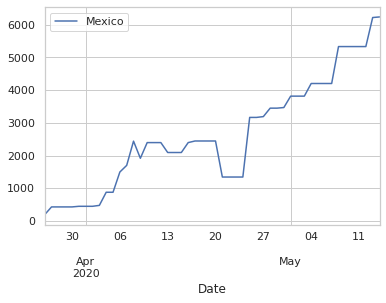

In [14]:
mexico['daily_pruebas'].rolling(window=7).median()[-50:].plot(logy=False)

### México: Proporción de confirmados del total de pruebas reportadas por día

,Mexico
Date,
2020-05-01,0.397013
2020-05-02,0.518248
2020-05-03,0.675293
2020-05-04,0.341266
2020-05-05,0.199182
2020-05-06,0.301876
2020-05-07,0.318803
2020-05-08,0.305694
2020-05-09,0.412165


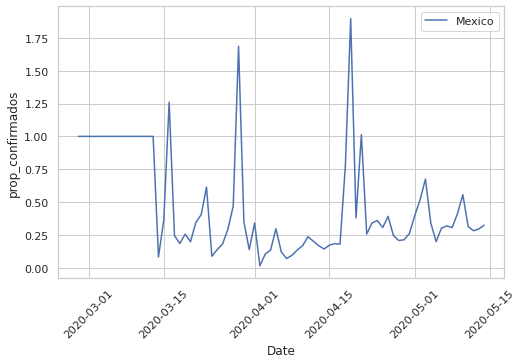

In [15]:
mexico['prop_confirmados'] = mexico['daily_confirmados'] / mexico['daily_pruebas']
analysis(mexico, ['Mexico'], 'prop_confirmados', smooth=False, log=False, since=None)

,Mexico
Date,
2020-05-01,0.227431
2020-05-02,0.235502
2020-05-03,0.244900
2020-05-04,0.248948
2020-05-05,0.246300
2020-05-06,0.248968
2020-05-07,0.252673
2020-05-08,0.255351
2020-05-09,0.261104


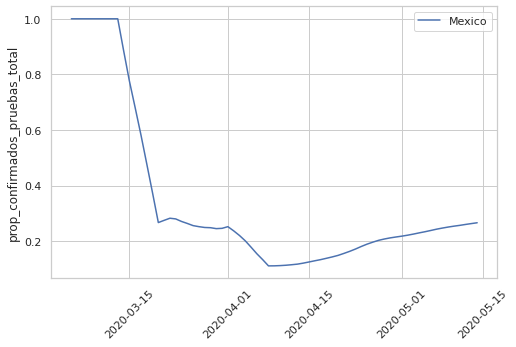

In [16]:
mexico['prop_confirmados_pruebas_total'] = mexico['confirmados'] / mexico['pruebas']
analysis(mexico, ['Mexico'], 'prop_confirmados_pruebas_total', smooth=True, smooth_window=7, log=False, since=None)

### México: proporción de fallecimientos a pruebas, acumulados

,Mexico
Date,
2020-05-01,0.021626
2020-05-02,0.021974
2020-05-03,0.022475
2020-05-04,0.022691
2020-05-05,0.023726
2020-05-06,0.024362
2020-05-07,0.025262
2020-05-08,0.025598
2020-05-09,0.026165


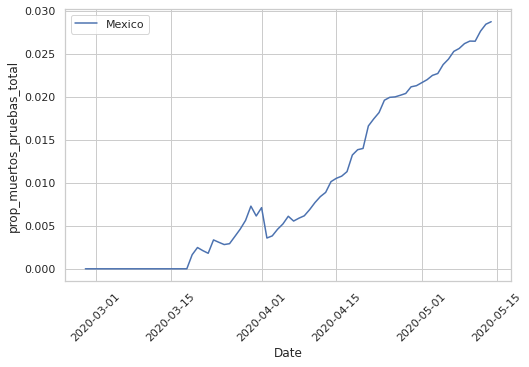

In [17]:
mexico['prop_muertos_pruebas_total'] = mexico['muertos'] / mexico['pruebas']
analysis(mexico, ['Mexico'], 'prop_muertos_pruebas_total', smooth=False, log=False, since=None)

,Mexico
Date,
2020-05-01,0.095087
2020-05-02,0.093309
2020-05-03,0.091773
2020-05-04,0.091146
2020-05-05,0.096330
2020-05-06,0.097850
2020-05-07,0.099980
2020-05-08,0.100247
2020-05-09,0.100209


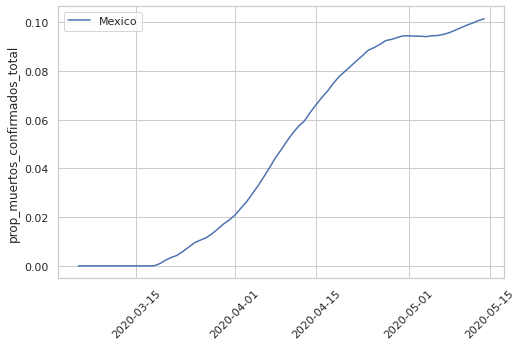

In [18]:
mexico['prop_muertos_confirmados_total'] = mexico['muertos'] / mexico['confirmados']
analysis(mexico, ['Mexico'], 'prop_muertos_confirmados_total', smooth=True, smooth_window=7, log=False, since=None)

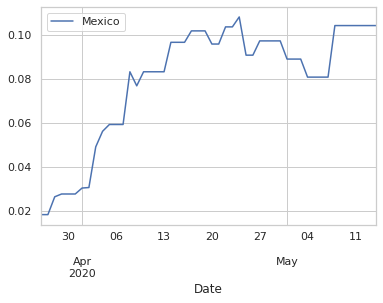

In [19]:
mexico['prop_muertos_confirmados_daily'] = mexico['daily_muertos'] / mexico['daily_confirmados']
mexico['prop_muertos_confirmados_daily'].rolling(window=7).median()[-50:].plot()

## Estados

### Estados: Confirmados acumulados

Estado,Ciudad de México,Nuevo León,Jalisco,Queretaro
Date,,,,
2020-05-01,6491,376,377,150
2020-05-02,7035,415,388,158
2020-05-03,7486,428,419,165
2020-05-04,7916,451,448,177
2020-05-05,8158,478,472,177
2020-05-06,8814,520,494,189
2020-05-07,9533,574,510,205
2020-05-08,10276,609,559,220
2020-05-09,10911,616,595,230


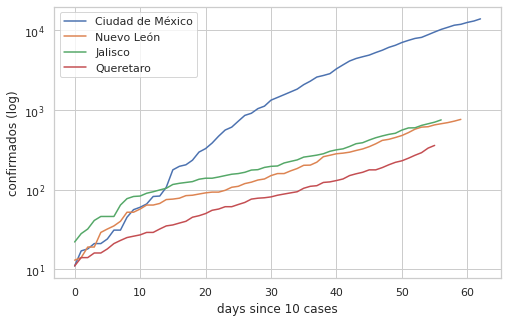

In [20]:
analysis(estados, estados_analisis, "confirmados", since=10, log=True, smooth=False)

### Estados: Confirmados diarios

,Ciudad de México,Nuevo León,Jalisco,Queretaro
Date,,,,
2020-05-01,378,30,29,14
2020-05-02,544,39,11,8
2020-05-03,451,13,31,7
2020-05-04,430,23,29,12
2020-05-05,242,27,24,0
2020-05-06,656,42,22,12
2020-05-07,719,54,16,16
2020-05-08,743,35,49,15
2020-05-09,635,7,36,10


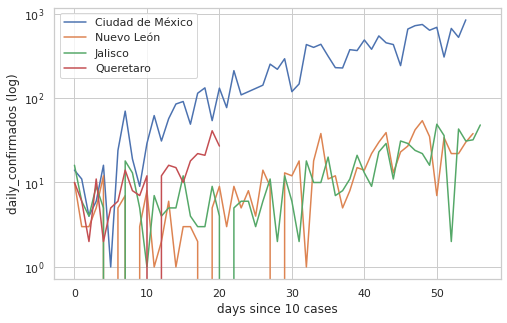

In [21]:
analysis(estados, estados_analisis, "daily_confirmados", since=10, log=True, smooth=False, smooth_window=7)

### Estados: Fallecimientos diarios 

,Ciudad de México,Nuevo León,Jalisco,Queretaro
Date,,,,
2020-05-01,9,1,2,0
2020-05-02,33,2,2,2
2020-05-03,21,1,1,1
2020-05-04,27,3,1,1
2020-05-05,44,2,1,2
2020-05-06,61,3,2,0
2020-05-07,92,4,4,1
2020-05-08,33,1,6,1
2020-05-09,45,0,1,0


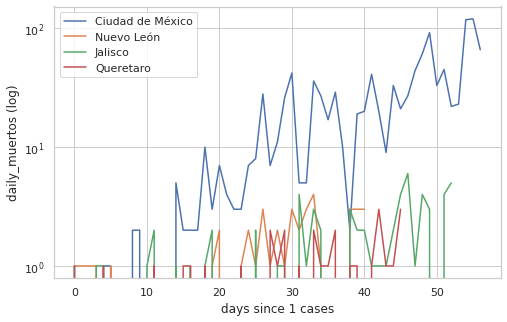

In [22]:
analysis(estados, estados_analisis, "daily_muertos", since=1, log=True, smooth=False)

### Estados: Trayectorias

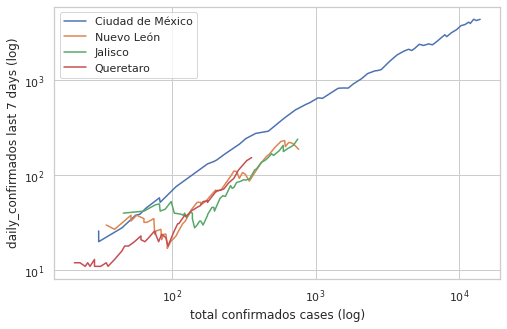

In [23]:
trajectories(estados, estados_analisis, 'confirmados', since=10, window=7)

,Ciudad de México,Nuevo León,Jalisco,Queretaro
Date,,,,
2020-05-01,22684,5917,5915,852
2020-05-02,23340,6044,6018,881
2020-05-03,23823,6143,6062,903
2020-05-04,25095,6358,6241,922
2020-05-05,26685,6614,6381,947
2020-05-06,28268,6911,6564,976
2020-05-07,30187,7116,6726,999
2020-05-08,32293,7307,6924,1022
2020-05-09,33425,7466,7165,1068


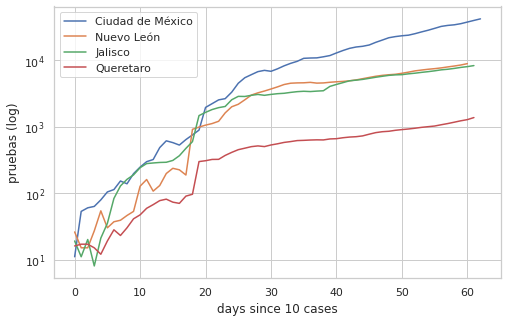

In [24]:
pruebas = {}
for estado in estados['confirmados'].columns:
    pruebas[estado] = estados['confirmados'][estado] + estados['probables'][estado] + estados['descartados'][estado]
estados['pruebas'] = pd.DataFrame(pruebas)
estados['daily_pruebas'] = get_new_per_day(estados['pruebas'])
    
analysis(estados, estados_analisis, "pruebas", since=10, log=True, smooth=False)
#pruebas[-30:].plot(logy=True)

,Ciudad de México,Nuevo León,Jalisco,Queretaro
Date,,,,
2020-05-01,889,183,186,13
2020-05-02,656,127,103,29
2020-05-03,483,99,44,22
2020-05-04,1272,215,179,19
2020-05-05,1590,256,140,25
2020-05-06,1583,297,183,29
2020-05-07,1919,205,162,23
2020-05-08,2106,191,198,23
2020-05-09,1132,159,241,46


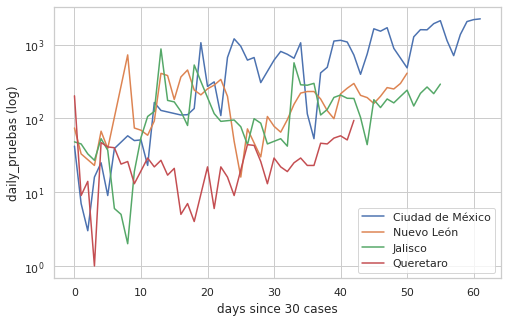

In [25]:
analysis(estados, estados_analisis, "daily_pruebas", since=30, log=True, smooth=False)

# Mundo

In [39]:
analysis_countries = ["Mexico", "US", "Spain", "Italy", "Australia", "Korea, South", "Brazil", "United Kingdom"]
world = load_johns_hopkins()

## Mundo: Confirmados acumulados

Country/Region,Mexico,US,Spain,Italy,Australia,"Korea, South",Brazil,United Kingdom
Date,,,,,,,,
2020-05-01,20739,1103461,215216,207428,6778,10780,92202,178685
2020-05-02,22088,1132539,216582,209328,6799,10793,97100,183500
2020-05-03,23471,1158040,217466,210717,6822,10801,101826,187842
2020-05-04,24905,1180375,218011,211938,6847,10804,108620,191832
2020-05-05,26025,1204351,219329,213013,6875,10806,115455,196243
2020-05-06,27634,1229331,220325,214457,6894,10810,126611,202359
2020-05-07,29616,1257023,221447,215858,6913,10822,135773,207977
2020-05-08,31522,1283929,222857,217185,6918,10840,146894,212629
2020-05-09,33460,1309550,223578,218268,6939,10874,156061,216525


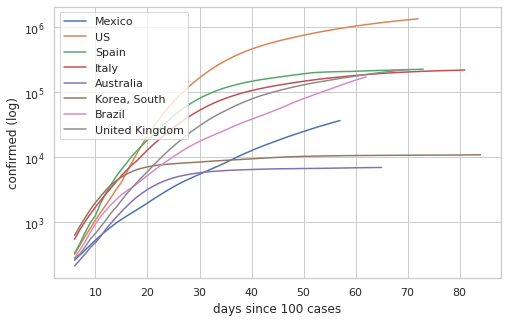

In [40]:
analysis(world, analysis_countries, "confirmed")

## Mundo: Confirmados diarios

,Mexico,US,Spain,Italy,Australia,"Korea, South",Brazil,United Kingdom
Date,,,,,,,,
2020-05-01,1515,34037,1781,1965,12,6,5015,6204
2020-05-02,1349,29078,1366,1900,21,13,4898,4815
2020-05-03,1383,25501,884,1389,23,8,4726,4342
2020-05-04,1434,22335,545,1221,25,3,6794,3990
2020-05-05,1120,23976,1318,1075,28,2,6835,4411
2020-05-06,1609,24980,996,1444,19,4,11156,6116
2020-05-07,1982,27692,1122,1401,19,12,9162,5618
2020-05-08,1906,26906,1410,1327,5,18,11121,4652
2020-05-09,1938,25621,721,1083,21,34,9167,3896


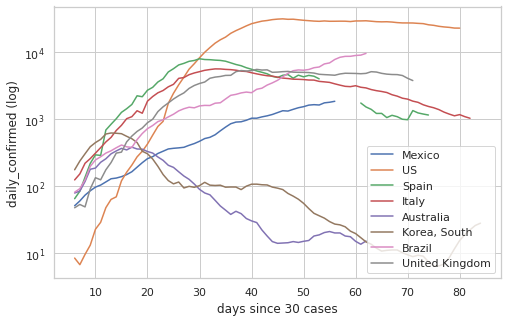

In [41]:
analysis(world, analysis_countries, "daily_confirmed", since=30)

## Mundo: Fallecimientos acumulados

Country/Region,Mexico,US,Spain,Italy,Australia,"Korea, South",Brazil,United Kingdom
Date,,,,,,,,
2020-05-01,1972,64943,24543,28236,93,250,6412,27583
2020-05-02,2061,66369,25100,28710,94,250,6761,28205
2020-05-03,2154,67682,25264,28884,95,252,7051,28520
2020-05-04,2271,68922,25428,29079,96,254,7367,28809
2020-05-05,2507,71064,25613,29315,97,255,7938,29501
2020-05-06,2704,73455,25857,29684,97,256,8588,30150
2020-05-07,2961,75662,26070,29958,97,256,9190,30689
2020-05-08,3160,77180,26299,30201,97,256,10017,31316
2020-05-09,3353,78795,26478,30395,97,256,10656,31662


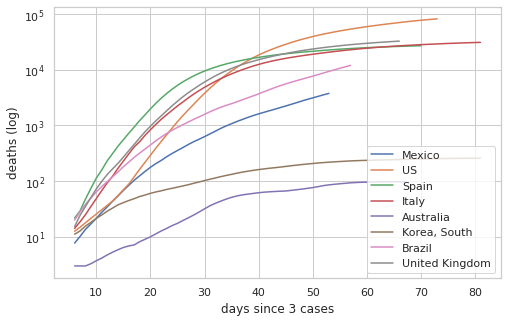

In [42]:
analysis(world, analysis_countries, "deaths", since=3)

## Mundo: Fallecimientos diarios

,Mexico,US,Spain,Italy,Australia,"Korea, South",Brazil,United Kingdom
Date,,,,,,,,
2020-05-01,113,1947,0,269,0,2,406,741
2020-05-02,89,1426,557,474,1,0,349,622
2020-05-03,93,1313,164,174,1,2,290,315
2020-05-04,117,1240,164,195,1,2,316,289
2020-05-05,236,2142,185,236,1,1,571,692
2020-05-06,197,2391,244,369,0,1,650,649
2020-05-07,257,2207,213,274,0,0,602,539
2020-05-08,199,1518,229,243,0,0,827,627
2020-05-09,193,1615,179,194,0,0,639,346


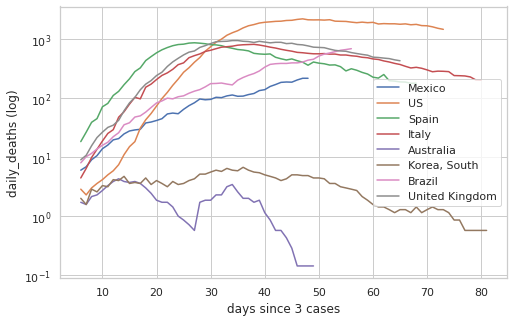

In [43]:
analysis(world, analysis_countries, "daily_deaths", since=3)

## Mundo: Trayectorias de casos confirmados

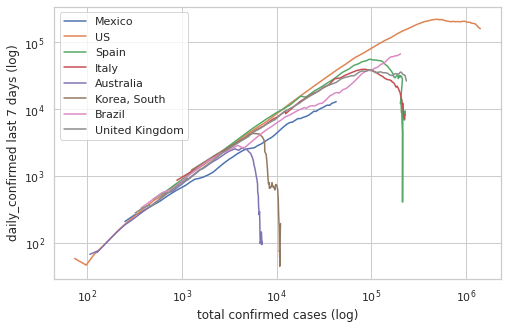

In [44]:
trajectories(world, analysis_countries, 'confirmed', since=50, window=7)

### Revisando

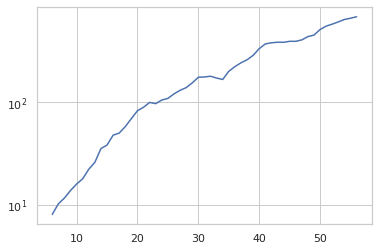

In [45]:
#Aqui hay algunas diferencias con los datos de FT https://www.ft.com/coronavirus-latest 
#  sobre todo en el número de días, ¿es por el rolling average?
d = world['daily_deaths']['Brazil']
d = get_values_since_first_geq(d, 3).reset_index(drop=True)
d = d.rolling(window=7).mean()
d.plot(logy=True)